# AB-тестирование
## Задание AB.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 — 30 баллов
* Задача 2 — 60 баллов
* Задача 3 — 40 баллов
* Задача 4 — 100 баллов



In [ ]:
# Bot check

# HW_ID: ds_ab4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

from statsmodels.stats.proportion import proportion_confint

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

from catboost import CatBoostRegressor
from statsmodels.formula.api import ols

sns.set(palette='Set2', style='whitegrid', font_scale=1.2)

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

---
### Задача 1.

Выведите формулу MDE для относительного t-теста.

Статистика теста

$$R = R(\overline X, \overline Y) = \frac{\overline X - \overline Y}{\overline Y}$$

Распределение

$$\sqrt n \left( \frac{R}{\hat \sigma_R}\right) \xrightarrow{d} \mathcal{N}(0, 1)$$

Где

$$\hat \sigma_R^2 = \frac{\hat \sigma_X^2}{\hat \mu_Y^2} + \frac{\hat \sigma_Y^2 \hat \mu_X^2}{\hat \mu_Y^4}$$

Сам критерий с уровнем значимости $\alpha$:

$$\sqrt n \left( \frac{R}{\hat \sigma_R}\right) \geq Z_{1-\alpha}$$

Пусть мощность $\beta$, $n$ - размер выборок, $\varepsilon$ - эффект (аддитивный)

Имеем:

$$\sqrt n \left(\frac{\overline X - \overline Y - \varepsilon}{\overline Y}\big/\hat \sigma_R\right) \sim \mathcal{N}(0, 1)$$

$$\sqrt n \left(\frac{R}{\hat \sigma_R} - \frac{\varepsilon}{\hat\sigma_R\overline Y}\right) \sim \mathcal{N}(0, 1)$$

Хотим условие на мощность:

$$P_\varepsilon \left(\sqrt n \left( \frac{R}{\hat \sigma_R}\right) \geq Z_{1-\alpha}\right) \geq \beta$$

Итого

$$P_\varepsilon \left(\sqrt n \left( \frac{R}{\hat \sigma_R} - \frac{\varepsilon}{\hat\sigma_R\overline Y} \right) \geq Z_{1-\alpha} - \sqrt n \frac{\varepsilon}{\hat\sigma_R\overline Y}\right) \geq \beta$$

$$Z_{1-\alpha} - \sqrt n \frac{\varepsilon}{\hat\sigma_R\overline Y} \leq Z_{1-\beta}$$

$$\sqrt n \frac{\varepsilon}{\hat\sigma_R\overline Y} = Z_{1-\alpha} - Z_{1-\beta}$$

$$MDE = \varepsilon = \frac{(Z_{1-\alpha} + Z_{\beta})\hat\sigma_R\overline Y}{\sqrt n}$$

---
### Задача 2.

Продолжим планировать АБ-тест из задачи AB.3.2. Поскольку пользователей достаточно много, предлагается рассмотреть возможность использования метода бакетов. И хотя все данные помещаются в память, отработать навык стоит на простых примерах.

Выберите некоторым образом количество бакетов и обоснуйте свой выбор.

У нас ~10000 пользователей, возьмем 200 бакетов - тогда в одном будет 10000/200 = 50 пользователей. 200 бакетов - не слишком много, а 50 в одном бакете - уже достаточно стабильно

Выполните разделение на бакеты и проверьте, что количество пользователей в бакетах примерно одинаковое. Подумайте, как лучше выполнить такую проверку.

Импорт данных

In [27]:
data = pd.read_csv("miptstats_metrica.tsv", sep="\t")
data.columns = data.columns.str.replace(r'^ym:s:', '', regex=True)
data["dateTimeUTC"] = pd.to_datetime(data["dateTimeUTC"])

Вспомогательные функции

In [159]:
def run_experiments(
    test, generate_sample_x, generate_sample_y=None, 
    n_iter=10000, sample_size=1000, alpha=0.05, draw=True, show_pvals=True
):    
    '''
    Проведение серии AA-тестов на искусственных выборках.
    
    Аргументы:
    test -- статистический критерий
    generate_sample_x, generate_sample_y -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    draw -- рисовать ли график
    show_pvals -- показывать ли распределение p-value

    Возвращает:
    type_1_prob_est -- оценка вероятности ошибки первого рода
    left_bound, right_bound -- границы доверительного интервала
    '''
    
    if generate_sample_y is None:
        generate_sample_y = generate_sample_x

    n_rejects = 0  # количество отвержений H_0
    pvals = []

    # Проведение экспериментов
    for _ in tqdm(range(n_iter), leave=False):
        # Генерируем выборки
        x = generate_sample_x(size=sample_size)
        y = generate_sample_y(size=sample_size)
        # Применияем критерий
        pvals.append(test(x, y)[1])
        n_rejects += (pvals[-1] < alpha)

    
    # Оценка вероятности ошибки первого рода 
    type_1_prob_est, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)
    
    # Визуализация
    if draw:
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(type_1_prob_est, left_bound, right_bound, show_pvals, pvals, alpha, figsize)

    return type_1_prob_est, (left_bound, right_bound)



def visualization(prob_reject, left_bound, right_bound,
                  show_pvals=False, pvals=None, alpha=0.05, figsize=(7, 2)):
    '''
    Отрисовка интервала для вероятности отвержения критерия 
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    '''
    
    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(pvals, bins=np.linspace(0, 1, 21), alpha=0.7,
                    weights=np.ones(len(pvals)) / len(pvals))
            plt.title('Распределение p-value')

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
        plt.title(
            f'Доля отвержений = {100*prob_reject:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

def estimate_reject_prob(n_rejects, n_iter):
    '''
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности
   
    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов
   
    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    '''
   
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method='wilson')
   
    return prob_reject, left_bound, right_bound


def draw_power(powers, left_powers, right_powers, effects_list=np.linspace(0, 0.1, 11), label=None, 
               title='Графики мощности', new_figure=False):
    '''
    Построение и отрисовка графика мощности критерия.
   
    Аргументы:
    powers -- оценка мощности
    left_powers, right_powers -- границы соотв. дов. интервала
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    '''

    if new_figure:
        plt.figure(figsize=(20, 9))
    
    plt.plot(effects_list, powers, label=label, lw=3)
    plt.fill_between(effects_list, left_powers, right_powers, alpha=0.3)
    
    if new_figure:
        plt.hlines(0.8, effects_list[0], effects_list[-1], color='black', alpha=0.5,
                   label='Мощность 0.8 (пересечение — MDE)')
    plt.legend()
    plt.xlabel('Размер относительного эффекта')
    plt.ylabel('Мощность')
    plt.title(title)
    
def bucket_transform(data, num_buckets):
    '''
    Создает бакеты из данных.
    
    data -- таблица с полями user_id и session_lengths
    num_buckets -- число бакетов
    '''

    data['bucketID'] = data['clientID'].apply(lambda x: np.abs(hash(x)) % num_buckets)
    return data #data.groupby(by='bucketID')['pageViews'].mean()

Рассмотрим на распределение числа визитов по бакетам

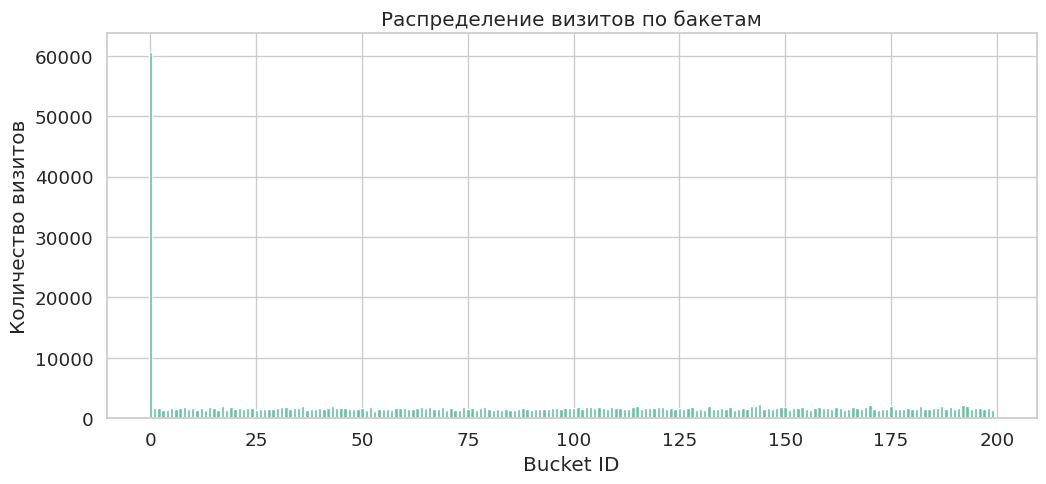

Среднее количество пользователей в бакете: 1936.77
Максимальный размер бакета: 60695
Минимальный размер бакета: 1235
Стандартное отклонение: 4180.02


In [160]:
bucket_data = bucket_transform(data, 200)

bucket_counts = bucket_data["bucketID"].value_counts()

plt.figure(figsize=(12, 5))
plt.bar(bucket_counts.index, bucket_counts.values)
plt.xlabel("Bucket ID")
plt.ylabel("Количество визитов")
plt.title("Распределение визитов по бакетам")
plt.show()

print(f"Среднее количество пользователей в бакете: {bucket_counts.mean():.2f}")
print(f"Максимальный размер бакета: {bucket_counts.max()}")
print(f"Минимальный размер бакета: {bucket_counts.min()}")
print(f"Стандартное отклонение: {bucket_counts.std():.2f}")

Такое странное число визитов в первом бакете связано с тем, что clientID = 0 - общий для большого числа визитов

In [161]:
len(data[data['clientID'] == 0])

58700

Посмотрим на эти данные

In [162]:
data[data['clientID'] == 0]

,visitID,clientID,dateTimeUTC,startURL,endURL,pageViews,visitDuration,isNewUser,bounce,regionCountry,...,mobilePhone,operatingSystemRoot,browser,browserEngine,screenOrientation,screenWidth,screenHeight,windowClientWidth,windowClientHeight,bucketID
2332,6.093662e+17,0,2020-02-16 00:42:27,https://wiki.yandex.ru/homepage/3spring20/.edit,https://wiki.yandex.ru/homepage/,18,2114,0,0,Russia,...,NaN,gnu_linux,yandex_browser,WebKit,0,0,0,0,0,0
2334,6.096791e+17,0,2020-02-16 01:02:21,https://wiki.yandex.ru/?status=ok,https://wiki.yandex.ru/,6,401,1,0,Russia,...,NaN,macos,safari,WebKit,0,0,0,0,0,0
2336,6.099625e+17,0,2020-02-16 01:20:22,https://wiki.yandex.ru/?status=ok,https://wiki.yandex.ru/homepage/3spring20/,2,7,1,0,Russia,...,NaN,gnu_linux,firefox,Gecko,0,0,0,0,0,0
2343,6.183388e+17,0,2020-02-16 10:12:55,https://wiki.yandex.ru/homepage/3spring20/,https://wiki.yandex.ru/homepage/3spring20/,285,5847,0,0,Russia,...,NaN,gnu_linux,yandex_browser,WebKit,0,0,0,0,0,0
2349,6.194122e+17,0,2020-02-16 11:21:10,https://wiki.yandex.ru/,https://wiki.yandex.ru/homepage/3spring20/,2,11,0,0,Russia,...,NaN,windows,chrome,WebKit,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386287,8.126137e+17,0,2024-02-25 00:04:35,https://wiki.yandex.ru/,https://wiki.yandex.ru/,1,0,0,1,Russia,...,NaN,macos,chrome,WebKit,0,0,0,0,0,0
386985,8.296468e+17,0,2024-02-25 18:07:31,https://wiki.yandex.ru/,https://wiki.yandex.ru/,1,0,0,1,Russia,...,NaN,gnu_linux,yandex_browser,WebKit,0,0,0,0,0,0
387076,8.310081e+17,0,2024-02-25 19:34:04,https://wiki.yandex.ru/,https://wiki.yandex.ru/,7,2429,0,0,Russia,...,NaN,macos,yandex_browser,WebKit,0,0,0,0,0,0
387159,8.321213e+17,0,2024-02-25 20:44:50,https://wiki.yandex.ru/,https://wiki.yandex.ru/,3,5,0,0,Russia,...,NaN,macos,yandex_browser,WebKit,0,0,0,0,0,0


Посмотрим на ссылки этих визитов

In [163]:
from urllib.parse import urlparse
from collections import Counter

start_urls = data.loc[data["clientID"] == 0, "startURL"].dropna()
end_urls = data.loc[data["clientID"] == 0, "endURL"].dropna()

start_domains = [urlparse(url).netloc for url in start_urls]
end_domains = [urlparse(url).netloc for url in end_urls]

all_domains = start_domains + end_domains
domain_counts = Counter(all_domains)

domain_counts.most_common(10)

[('wiki.yandex.ru', 116567),
 ('wiki.yandex.com', 577),
 ('mipt-stats.gitlab.io', 130),
 ('forms.yandex.ru', 78),
 ('mc.yandex.ru', 8),
 ('miptstats.github.io', 6),
 ('phind.com', 4)]

Нас не интересует дизайн сайта wiki.yandex.ru, это посторонние визиты. Можно смело выкинуть этих пользователей. Теперь проверим, что распределение визитов по бакетам и пользователей по бакетам равномерное (на самом деле с clientID = 0 за ферваль мало визитов). Тогда все корректно

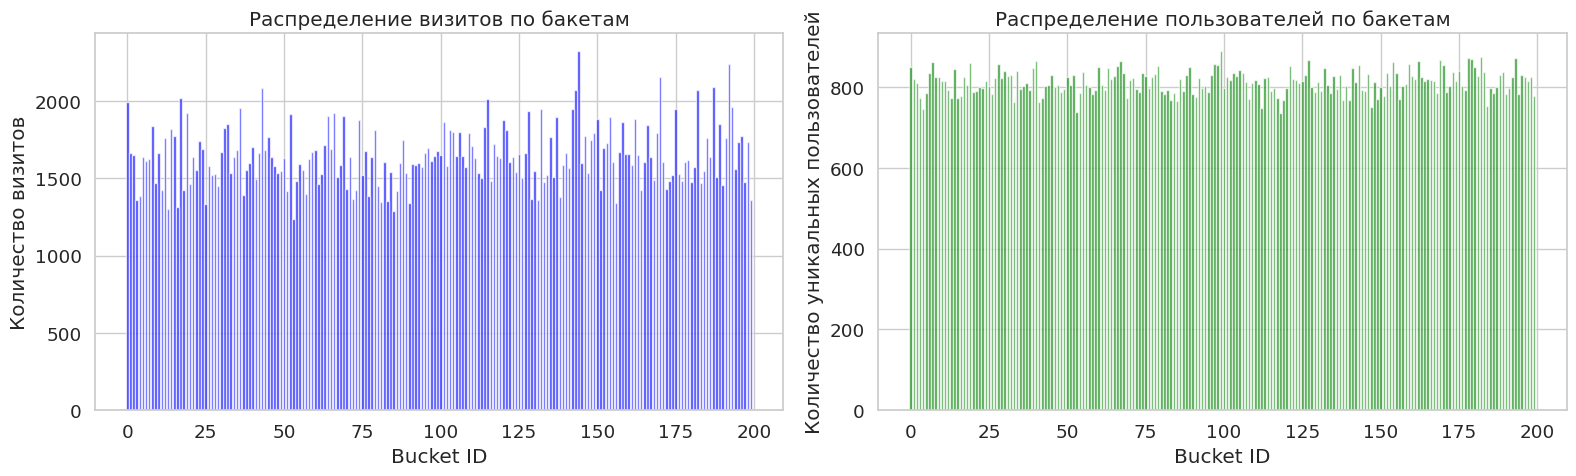

Среднее количество визитов в бакете: 1643.27
Максимальный размер бакета (по визитам): 2321
Минимальный размер бакета (по визитам): 1235
Стандартное отклонение (по визитам): 191.26

Среднее количество пользователей в бакете: 812.37
Максимальный размер бакета (по пользователям): 889
Минимальный размер бакета (по пользователям): 736
Стандартное отклонение (по пользователям): 29.38


In [164]:
data_clear = data[data['clientID'] != 0]

bucket_data = bucket_transform(data_clear, 200)

bucket_counts = bucket_data["bucketID"].value_counts()

user_counts = bucket_data.groupby("bucketID")["clientID"].nunique()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].bar(bucket_counts.index, bucket_counts.values, color='blue', alpha=0.7)
axes[0].set_xlabel("Bucket ID")
axes[0].set_ylabel("Количество визитов")
axes[0].set_title("Распределение визитов по бакетам")

axes[1].bar(user_counts.index, user_counts.values, color='green', alpha=0.7)
axes[1].set_xlabel("Bucket ID")
axes[1].set_ylabel("Количество уникальных пользователей")
axes[1].set_title("Распределение пользователей по бакетам")

plt.tight_layout()
plt.show()

print(f"Среднее количество визитов в бакете: {bucket_counts.mean():.2f}")
print(f"Максимальный размер бакета (по визитам): {bucket_counts.max()}")
print(f"Минимальный размер бакета (по визитам): {bucket_counts.min()}")
print(f"Стандартное отклонение (по визитам): {bucket_counts.std():.2f}")

print(f"\nСреднее количество пользователей в бакете: {user_counts.mean():.2f}")
print(f"Максимальный размер бакета (по пользователям): {user_counts.max()}")
print(f"Минимальный размер бакета (по пользователям): {user_counts.min()}")
print(f"Стандартное отклонение (по пользователям): {user_counts.std():.2f}")


Теперь видно что все в порядке с бакетами

Аналогично задаче AB.3.2 провалидируйте метод бакетов, проведя серию АА-тестов по историческим данным, семплируя момент времени начала эксперимента и сами группы пользователей.

In [309]:
def get_february_data(size, data=data):
    start_date = "2024-02-01"
    end_date = "2024-02-29"
    
    february_data = bucket_data[(bucket_data["dateTimeUTC"] >= start_date) & (bucket_data["dateTimeUTC"] <= end_date)]

    unique_buckets = february_data["bucketID"].unique()
    
    half_size = size // 2
    if len(unique_buckets) < size:
        raise ValueError(f"Недостаточно уникальных бакетов ({len(unique_buckets)}) для запрошенного размера ({size})")
    
    bucket_means = february_data.groupby("bucketID")["pageViews"].mean().reset_index()
    bucket_ids = bucket_means["bucketID"].sample(frac=1).values
    half_size = len(bucket_ids) // 2
    
    part1_buckets = bucket_ids[:half_size]
    part2_buckets = bucket_ids[half_size:]
    
    part1 = bucket_means[bucket_means["bucketID"].isin(part1_buckets)]
    part2 = bucket_means[bucket_means["bucketID"].isin(part2_buckets)]

    return part1, part2

def add_effect(x, effect, relative_effect=True):
    '''
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- эффект
    relative_effect -- если True, эффект применяется относительно значений выборки

    Возвращает:
    result -- выборка с добавленным эффектом
    '''
    result = x.copy()
    
    if relative_effect:
        result += np.abs(result) * effect
    else:
        result += effect
    
    return result

def visualization(prob_reject, left_bound, right_bound,
                  show_pvals=False, pvals=None, alpha=0.05, figsize=(7, 2), title=None):
    '''
    Отрисовка интервала для вероятности отвержения критерия 
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    '''
    
    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(pvals, bins=np.linspace(0, 1, 21), alpha=0.7,
                    weights=np.ones(len(pvals)) / len(pvals))
            plt.title('Распределение p-value')

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
        plt.title(
            f'Доля отвержений = {100*prob_reject:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

def estimate_power(
    test, generate_samples, 
    n_iter=10000, sample_size=1000, effects_list=np.linspace(0, 0.1, 11),
    relative_effect=True, 
    alpha=0.05, target_column='pageViews'
):
    '''
    Проведение серии тестов на искусственных выборках для оценки мощности.
    
    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effects_list -- список добавляемых эффектов
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    '''
    
    powers = np.zeros(len(effects_list))
    left_bounds = np.zeros(len(effects_list))
    right_bounds = np.zeros(len(effects_list))
    
    for i, effect in enumerate(tqdm(effects_list, desc="Processing effects", leave=False)):
        powers[i], (left_bounds[i], right_bounds[i]) = run_experiments(
            test, generate_samples, 
            n_iter=n_iter, sample_size=sample_size, effect=effect, relative_effect=relative_effect, 
            alpha=alpha, draw=False, target_column=target_column
        )
        
    return powers, left_bounds, right_bounds

def run_experiments(test, generate_sample, sample_size,
            add_effect=add_effect, title=None,
            effect=0, relative_effect=True,
            target_column='pageViews',
            draw=False, show_pvals=True,
            n_iter=10000, alpha=0.05):    
    '''
    Проведение серии AB-тестов на исторических данных
   
    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    sample_size -- размер выборки
    add_effect -- функция для искусственного добавления эффекта в тестовую выборку
    title -- название графика
    data -- исторические данные, на которых запускаем АА-тест. 
        None, если используем искусственные данные
    effect -- значение добавляемого эффекта
    relative_effect -- относительный ли эффект
    target_column -- целевая колонка
    draw -- рисовать ли график
    show_pvals -- рисовать ли гистограмму p-value
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости

    Возвращает:
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    '''

    n_rejects = 0 # количество отвержений 
    pvals = []

    # Проведение экспериментов
    for _ in range(n_iter):
        # Генерируем выборки
        x, y = generate_sample(sample_size) 
        x[target_column] = add_effect(x[target_column], effect, relative_effect=True)
        # Применияем критерий
        pvals.append(test(x, y)[1])
        n_rejects += (pvals[-1] < alpha)
        
    prob_reject, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)
    
    # Визуализация
    if draw:
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(
            prob_reject, left_bound, right_bound, show_pvals, 
            pvals, alpha, figsize, title
        )
        
    return prob_reject, (left_bound, right_bound)

Валидация

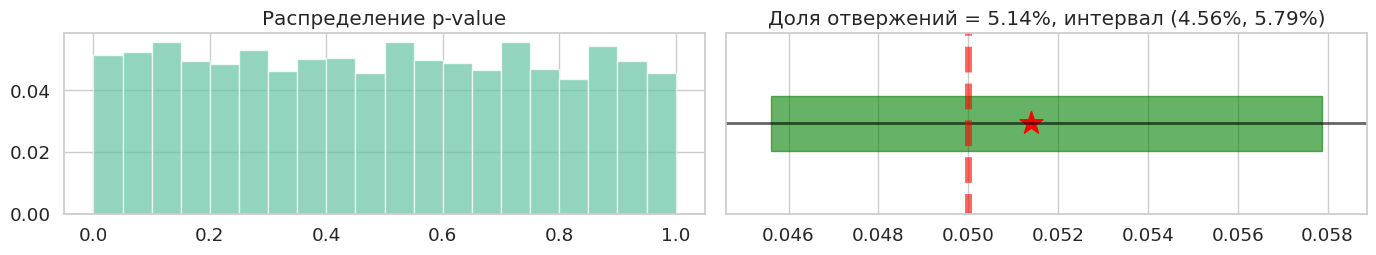

In [130]:
run_experiments(
    test=lambda x, y: sps.ttest_ind(x['pageViews'], y['pageViews']),
    generate_sample=lambda size: get_february_data(size, data=bucket_counts),
    sample_size=100,
    n_iter=5000,
    draw=True
);

Все ок

Теперь рассмотрим стратификацию по операционной системе. Выполните разделение на бакеты внутри каждой страты и проверьте равномерность разбиения.

Учтите, что в одном бакете должны быть пользователи только из одной страты, тем самым стратификация возможна на выборке бакетов.

Создадим на каждую ОС пропорциональное число бакет, так, чтобы суммарно было ~200 бакетов.

In [131]:
def stratified_bucket_transform(data, num_buckets):
    """
    Разделяет данные на бакеты внутри каждой страты (по операционной системе).
    
    :param data: DataFrame с данными пользователей.
    :param num_buckets: Общее количество бакетов.
    :return: DataFrame с добавленным столбцом bucketID.
    """
    data = data.copy()
    popular_os = ['windows', 'gnu_linux', 'ios_double', 'android', 'macos']
    data['operatingSystemRoot'] = data['operatingSystemRoot'].apply(lambda x: x if x in popular_os else 'windows')
    data["bucketID"] = -1 
    
    unique_os = data["operatingSystemRoot"].dropna().unique()  
    total_users = data["clientID"].nunique()
    
    os_user_counts = data.groupby("operatingSystemRoot")["clientID"].nunique()
    os_bucket_counts = (os_user_counts / total_users * num_buckets).round().astype(int)
    
    bucket_id = 0
    stratified_buckets = []

    for os in unique_os:
        os_data = data[data["operatingSystemRoot"] == os].copy()
        os_users = os_data["clientID"].unique()
        np.random.shuffle(os_users)

        os_buckets = os_bucket_counts.get(os, 1)
        os_buckets = max(os_buckets, 1) 
        
        user_buckets = np.array_split(os_users, os_buckets)

        for i, bucket_users in enumerate(user_buckets):
            os_data.loc[os_data["clientID"].isin(bucket_users), "bucketID"] = bucket_id + i

        stratified_buckets.append(os_data)
        bucket_id += os_buckets

    return pd.concat(stratified_buckets)

Провалидируйте метод бакетов со стратификацией.

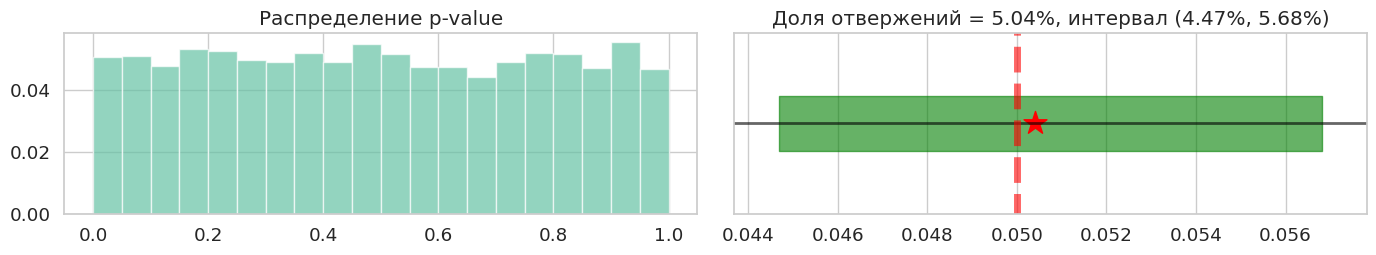

In [133]:
strat_bucket_data = stratified_bucket_transform(data_clear, 200)

run_experiments(
    test=lambda x, y: sps.ttest_ind(x['pageViews'], y['pageViews']),
    generate_sample=lambda size: get_february_data(size, data=strat_bucket_data),
    sample_size=100,
    n_iter=5000,
    draw=True
);

**Выводы:** 

Разделение на бакеты корректное и ничего не ломает.

---
### Задача 3.

Для всех критериев из задач AB.4.2 и AB.3.2, которые прошли валидацию по вероятности ошибки I рода, оцените MDE и сравните по нему критерии.

Функции для запуска критериев

In [313]:
from sklearn.model_selection import train_test_split

def calculate_strata_weights(data, strata_name, target_name):
    '''
    Вычисляет веса страт.

    
    :param data: исходные данные
    :param strata_name: название страты
    :param target_name: название таргеты
    :param strata_name: название страты
    :return: веса страт
    '''
    
    strata_weights = data.groupby(by=strata_name)[target_name].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights

def weighted_mean(data, strata_name, target_name, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param strata_name: название страты
    :param target_name: название таргеты
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by=strata_name)[target_name].mean()
    return (strata_means * weights).sum()

def absolute_ttest(x, y):
    """
    Абсолютный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    """
    res = sps.ttest_ind(x, y)
    stat, pvalue = res.statistic, res.pvalue
    left_bound, right_bound = res.confidence_interval()

    return stat, pvalue, left_bound, right_bound

def relative_ttest(x, y, alpha=0.05):
    """
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    """

    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    stat = x_mean / y_mean - 1
    var = x.var() / (y_mean**2) + y.var() * (x_mean**2) / (y_mean**4)
    std = np.sqrt(var)

    z_stat = np.sqrt(n) * stat / std
    pvalue = 2 * sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha / 2)
    left_bound = stat - q * std / np.sqrt(n)
    right_bound = stat + q * std / np.sqrt(n)

    return stat, pvalue, left_bound, right_bound

def simple_mean(data, strata_name, target_name, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data[target_name].mean()

def stratified_sampler(data, strata_name, target_name, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param target_name: название таргеты
    :param sample_size: размер выборки
    :return: две выборки
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data, strata_name, target_name)

    # Размер выборок
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(data.groupby(by=strata_name)):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)


def weighted_var(data, strata_name, target_name, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by=strata_name)[target_name].var()
    return (strata_vars * strata_weights).sum() / len(data)


def weighted_post_var(data, strata_name, target_name, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by=strata_name)[target_name].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition


def simple_var(data, strata_name, target_name, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data[target_name].var() / len(data)
    
def stratified_ttest(x_data, y_data, strata_name, target_name,
                     strata_weights, method='random', alpha=0.05):
    '''
    Стратифицированный абсолютный t-test.
    
    :param x_data: выборка вместе с информацией о стратах
    :param y_data: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''
    
    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
    elif method == 'post_stratified':
        mean_function = weighted_mean
        var_function = weighted_post_var
        
    x_mean = mean_function(x_data, strata_name, target_name, strata_weights)
    y_mean = mean_function(y_data, strata_name, target_name, strata_weights)
    x_var  =  var_function(x_data, strata_name, target_name, strata_weights)
    y_var  =  var_function(y_data, strata_name, target_name, strata_weights)
    
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    
    return stat, pvalue, left_bound, right_bound

def regression_ttest(x_data, y_data, sample_name='pilot', 
                     treatment_name='treatment', covariate_names=[],
                     stratify_by=None, ml_model=None):
    '''
    T-test с CUPED/без CUPED, реализованный через линейную регрессию c возможностью стратификации.
    
    Аргументы:
    x_data, y_data -- выборки одинакового размера (DataFrame)
    :param sample_name: имя столбца с целевой переменной
    :param covariate_names: массив имен столбцов-ковариат
    :param pre_exp_name: имя таргета посчитанного на пре
    :param stratify_by: категориальный признак для стратификации
    :param ml_model: МЛ-модель предсказывающая таргет по признакам для дальнейшего использования
    предсказания в качестве ковариата для CUPED

    Возвращает:
    stat -- статистика критерия
    pvalue -- p-value критерия
    left_bound, right_bound -- границы дов. интервала
    '''
    covariate_names = covariate_names.copy()
    x_data = x_data.copy()
    y_data = y_data.copy()
    
    x_data[treatment_name] = 1
    y_data[treatment_name] = 0

    data = pd.concat([x_data, y_data], ignore_index=True)

    if stratify_by:
        dummies = pd.get_dummies(data, columns=stratify_by, drop_first=True)

    if ml_model is not None:
        feature_cols = covariate_names
        categorical_cols = data[feature_cols].select_dtypes(include=['object']).columns.tolist()
    
        train_data = data.dropna(subset=[sample_name, treatment_name])

        for col in categorical_cols:
            train_data[col] = train_data[col].astype(str).fillna('unknown')

        
        X_train, X_test, y_train, y_test = train_test_split(train_data[feature_cols],
                                                            train_data[sample_name],
                                                            test_size=0.2,
                                                            random_state=42)
        
        ml_model.fit(X_train, y_train, cat_features=categorical_cols)
        data['ml_pred'] = ml_model.predict(data[feature_cols].fillna(0))
        covariate_names.append('ml_pred')

    feature_names = [treatment_name] + list(covariate_names)
    
    warnings.simplefilter("ignore", category=UserWarning)
    model = ols(f'{sample_name} ~ ' + ' + '.join(feature_names), data=data).fit(cov_type='HC3')

    summary = model.summary2().tables[1]

    stat = summary.loc[treatment_name, 'z']
    pvalue = summary.loc[treatment_name, 'P>|z|']
    left_bound = summary.loc[treatment_name, '[0.025']
    right_bound = summary.loc[treatment_name, '0.975]']

    return stat, pvalue, left_bound, right_bound

def prepare_dataset(data):
    """Создает датасет с новыми признаками, включая активность до февраля."""
    popular_os = ['windows', 'gnu_linux', 'ios_double', 'android', 'macos']
    data['operatingSystemRoot'] = data['operatingSystemRoot'].apply(lambda x: x if x in popular_os else 'windows')
    start_date = "2024-02-01"
    end_date = "2024-02-29"
    
    february_data = data[(data["dateTimeUTC"] >= start_date) & (data["dateTimeUTC"] <= end_date)]
    pre_exp_data = data[data["dateTimeUTC"] < start_date]
    
    numeric_features = ["pageViews"]
    categorical_features = ["regionCountry", "networkType", "browserLanguage",
                            "operatingSystemRoot", "browser", "screenOrientation"]
    binary_features = ["isNewUser"]
    
    agg_funcs = {feature: "mean" for feature in numeric_features}
    agg_funcs.update({feature: lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan for feature in categorical_features})
    agg_funcs.update({feature: "mean" for feature in binary_features})
    
    aggregated_data = february_data.groupby("clientID").agg(agg_funcs).reset_index()
    
    pre_exp_agg = pre_exp_data.groupby("clientID")["pageViews"].mean().rename("pre_exp_pageViews").to_frame()
    pre_exp_agg["was_active"] = 1
    
    aggregated_data = aggregated_data.merge(pre_exp_agg, on="clientID", how="left")
    
    aggregated_data["was_active"] = aggregated_data["was_active"].fillna(0)
    aggregated_data["pre_exp_pageViews"] = aggregated_data["pre_exp_pageViews"].fillna(0)
    
    return aggregated_data

def split_data(data, size):
    """Разбивает данные на две случайные группы одинакового размера."""
    active_clients = data["clientID"].unique()
    size = min(size, len(active_clients))
    
    selected_clients = np.random.choice(active_clients, size=size, replace=False)
    half_size = size // 2
    clients_part1, clients_part2 = selected_clients[:half_size], selected_clients[half_size:]
    
    part1 = data[data["clientID"].isin(clients_part1)]
    part2 = data[data["clientID"].isin(clients_part2)]
    
    return part1, part2


Агреграция данных

In [167]:
data_cp = data.copy()
improved_data = prepare_dataset(data_cp)
improved_data

,clientID,pageViews,regionCountry,networkType,browserLanguage,operatingSystemRoot,browser,screenOrientation,isNewUser,pre_exp_pageViews,was_active
0,0,3.408451,Russia,NaN,NaN,macos,chrome,0,0.133803,2.395949,1.0
1,16391933141196830,1.000000,Russia,cellular,ru,android,yandexsearch,1,1.000000,1.000000,1.0
2,16584151683302464,1.000000,Russia,NaN,ru,windows,chrome,2,0.500000,1.250000,1.0
3,16899224396248898,1.250000,Russia,NaN,ru,windows,opera,2,0.000000,0.000000,0.0
4,16938278493201088,11.200000,Russia,NaN,ru,windows,opera,2,0.000000,4.872611,1.0
...,...,...,...,...,...,...,...,...,...,...,...
13604,16728156971052448992,4.000000,Russia,cellular,ru,android,samsung_internet,1,1.000000,0.000000,0.0
13605,16746479061044149449,1.000000,Armenia,NaN,en,windows,chrome,2,0.000000,1.000000,1.0
13606,16749337621012426176,2.000000,Russia,cellular,en,android,samsung_internet,1,1.000000,0.000000,0.0
13607,16755278471001387184,10.000000,Russia,cellular,ru,android,chromemobile,1,0.500000,5.272727,1.0


Построим график мощности в зависимости от эффетка, найдем MDE (мощность 0.8), оттуда и сравнение.

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

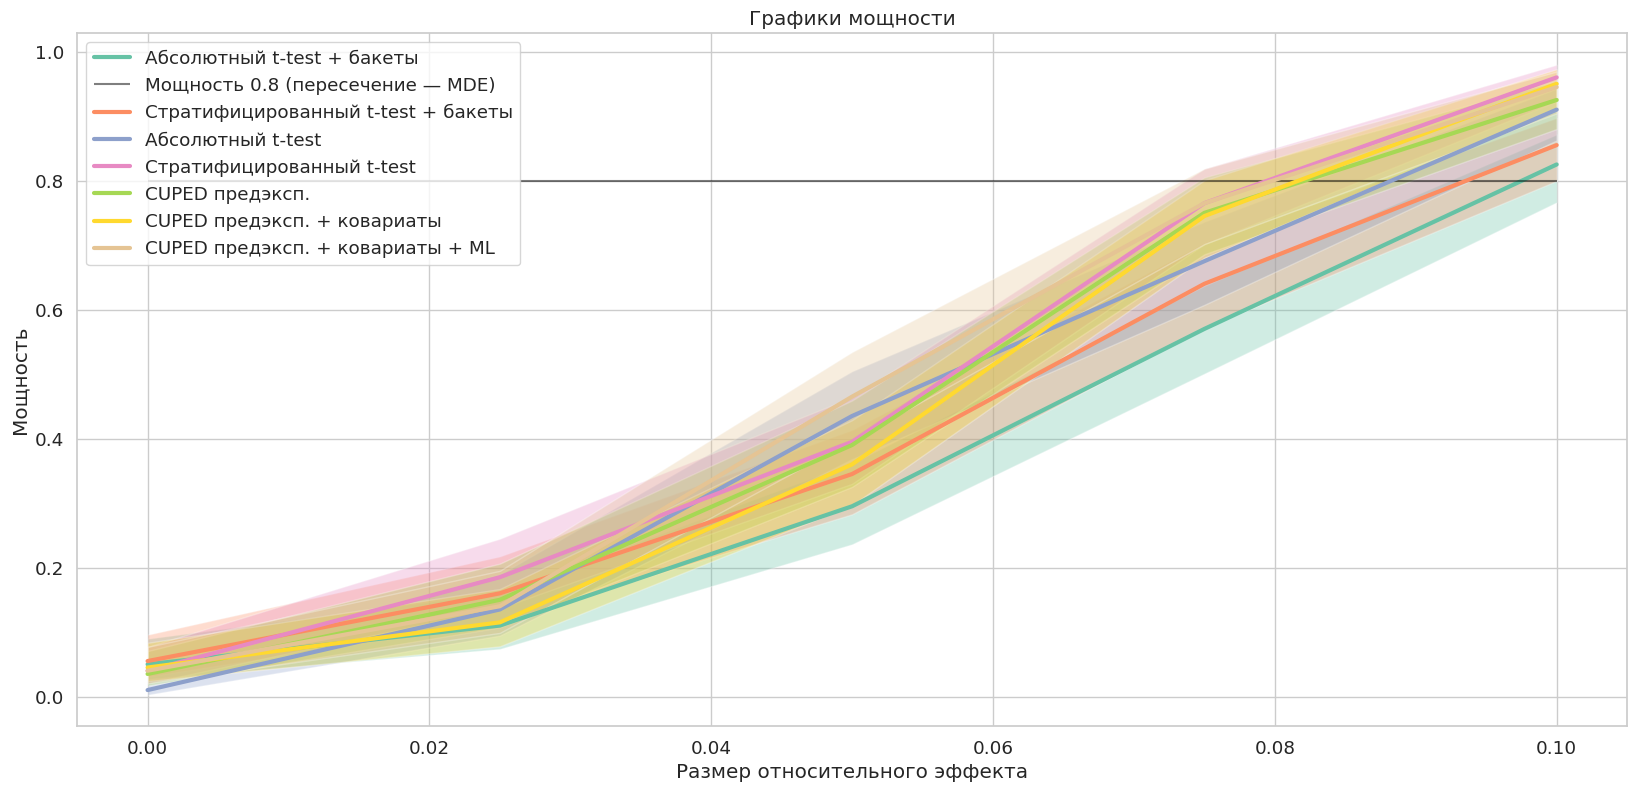

In [172]:
sample_size = 10000
n_iter = 1000
strata_weights=calculate_strata_weights(improved_data,
                                       'operatingSystemRoot',
                                       'pageViews')
model = CatBoostRegressor(iterations=50, verbose=0)

test_list = [
    lambda x, y: sps.ttest_ind(x['pageViews'], y['pageViews']),
    lambda x, y: sps.ttest_ind(x['pageViews'], y['pageViews']),
    lambda x, y: absolute_ttest(x['pageViews'], y['pageViews']),
    lambda x, y: stratified_ttest(x, y,
                                  strata_name='operatingSystemRoot',
                                  target_name='pageViews',
                                  strata_weights=strata_weights,
                                  method='stratified'),
    lambda x, y: regression_ttest(x, y,
                                 sample_name='pageViews',
                                 covariate_names=['pre_exp_pageViews'],
                                 stratify_by=['was_active']),
    lambda x, y: regression_ttest(x, y,
                                 sample_name='pageViews',
                                 covariate_names=['pre_exp_pageViews'],
                                 stratify_by=['was_active',
                                              'operatingSystemRoot',
                                              'browser']),
    lambda x, y: regression_ttest(x, y,
                                 sample_name='pageViews',
                                 covariate_names=['pre_exp_pageViews'],
                                 stratify_by=['was_active',
                                              'operatingSystemRoot',
                                              'browser'],
                                 ml_model=model)

]

data_sample_list = [
    lambda size: get_february_data(size * 200 // 13000, data=bucket_counts),
    lambda size: get_february_data(size * 200 // 13000, data=strat_bucket_data),
] + [lambda size: split_data(improved_data, size)] * 5

title_list = [
    'Абсолютный t-test + бакеты',
    'Стратифицированный t-test + бакеты',
    'Абсолютный t-test',
    'Стратифицированный t-test',
    'CUPED предэксп.',
    'CUPED предэксп. + ковариаты',
    'CUPED предэксп. + ковариаты + ML'
]

effects_list = np.linspace(0, 0.1, 5)
alpha = 0.05

for i, (test, name, sample_func) in enumerate(zip(test_list,
                                                  title_list,
                                                  data_sample_list)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples=sample_func,
        sample_size=10000,
        effects_list=effects_list,
        n_iter=200,
        alpha=alpha,
    )
    draw_power(
        powers,
        left_bounds,
        right_bounds,
        effects_list=effects_list,
        label=name,
        new_figure=(i == 0),
    )

**Выводы:** 

Лучшими методами оказались CUPED, что и ожидалось по результатам прошлой домашки. Бакеты несколько уменьшают мощность.

MDE позволяет сравнить между собой разные критерии.



---

### Задача 4.


Рассмотрим <a href="https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast">данные</a> о продажах 45 супермаркетов торговой сети Walmart с 2010 по 2012 годы. Датасет содержит 4 файла:
* `features.csv` &mdash; информация по неделям о средней температуре воздуха, цене на топливо, а также различная информация о рекламных акциях Walmart;

* `stores.csv` &mdash; информация о размере магазинов;

* `train.csv` &mdash; информация о недельных продажах для каждого отдела каждого магазина;

* `test.csv` &mdash; в данной задаче не требуется.

**Цель:** построить дизайн АБ-теста и ответить на вопрос, сколько магазинов потребуется для проведения AB-теста.

**Срок АБ-теста:** от 4 до 8 недель.

**Ожидаемый эффект:** +5% к продажам магазина суммарно по всем отделам.

---

Нужно попробовать и сравнить разные подходы CUPED и стратификации, используя различные варианты дополнительных данных:
* без использования доп. данных, то есть простой t-test;
* данные о продажах предпериода, то есть стандартный CUPED;
* категориальные признаки, то есть простая стратификация;
* вещественные признаки, то есть CUPED при использовании различных ковариат;
* прогнозирование продаж с помощью различных моделей (CUPAC):
    * линейные модели;
    * градиентный бустинг;
    * нейронные сети.
    
Для построения нейронных сетей можно, например, использовать исторические данные продаж по разным отделам одного/нескольких магазинов для прогнозирования суммарной выручки за следующий период одного/нескольких магазинов. Можно дополнительно использовать другие признаки. Используйте любые подходящие архитектуры нейронных сетей.

*Внимание!* В данных представлено достаточно мало магазинов, поэтому *честную валидацию скорее всего выполнить не получится*. Используя имеющиеся данные <u><b>требуется только как можно больше уменьшить дисперсию, которая участвует в формуле MDE</b></u>.


Во всех случаях можно использовать любые реализации методов понижения дисперсии, в том числе через линейную регрессию.

Будем рассчитывать следующим образом. Берем последние 4 недель продаж - здесь проводим эксперимент на исторических данные. Предисторический период - предыдущие 4 недель, по ним считаем таргетную метрику - продажи суммарно по всем отделам, а так же считаем ковариаты магазинов; аналогично аггегирую данные в период за 4 недели до предисторического периода - для обучения модели в CUPAC. Baseline - обычный t-test, сравним с улучшенными моделями, в том числе с CUPAC. Вычислим MDE, по ним подберем число магазинов для AB-теста.

Функция для преобработки данных:

In [321]:
import statsmodels.api as sm

def preprocess_experiment_data(features_path, stores_path, train_path):
    features = pd.read_csv(features_path, parse_dates=["Date"])
    stores = pd.read_csv(stores_path)
    train = pd.read_csv(train_path, parse_dates=["Date"])

    last_date = train["Date"].max()
    experiment_start_date = last_date - pd.Timedelta(weeks=6)
    pre_experiment_start_date = experiment_start_date - pd.Timedelta(weeks=4)
    pre_pre_experiment_start_date = pre_experiment_start_date - pd.Timedelta(weeks=4)
    
    train_experiment = train[train["Date"] >= experiment_start_date]
    train_pre_experiment = train[(train["Date"] < experiment_start_date) & (train["Date"] >= pre_experiment_start_date)]
    train_pre_pre_experiment = train[(train["Date"] < pre_experiment_start_date) & (train["Date"] >= pre_pre_experiment_start_date)]
    
    def calculate_sales_trend(sales_data):
        sales_data = sales_data.reset_index(drop=True)
        X = sm.add_constant(np.arange(len(sales_data)))
        y = sales_data.values
        model = sm.OLS(y, X).fit()
        return model.params[1] 
    
    def extract_covariates(train_subset, stores):
        covariates = []
        for store in train_subset["Store"].unique():
            store_data = train_subset[train_subset["Store"] == store]
            store_data = store_data.groupby("Date")["Weekly_Sales"].sum()
            avg_sales_4w = store_data.mean()
            sales_trend = calculate_sales_trend(store_data)
            sales_variance = store_data.var()
            store_features = stores[stores["Store"] == store].iloc[0]
            covariates.append({
                "Store": store,
                "Avg_Sales_4w": avg_sales_4w,
                "Sales_Trend": sales_trend,
                "Sales_Variance": sales_variance,
                "Store_Type": store_features["Type"],
                "Store_Size": store_features["Size"]
            })
        return pd.DataFrame(covariates)
    
    covariates_df = extract_covariates(train_pre_experiment, stores)
    pre_covariates_df = extract_covariates(train_pre_pre_experiment, stores)
    
    features_filtered = features[(features["Date"] < experiment_start_date) & (features["Date"] >= pre_experiment_start_date)]
    features_agg = features_filtered.groupby("Store")[["CPI", "Unemployment", "Fuel_Price", "Temperature"]].mean().reset_index()
    
    covariates_df = covariates_df.merge(features_agg, on="Store", how="left")
    pre_covariates_df = pre_covariates_df.merge(features_agg, on="Store", how="left")
    
    train_experiment = train_experiment.groupby("Store")["Weekly_Sales"].sum().reset_index()
    train_experiment = train_experiment.rename(columns={"Weekly_Sales": "Exp_Sales_SUM"})
    
    data = train_experiment.merge(covariates_df, on="Store", how="left", suffixes=("", "_Cov"))
    data = data.merge(pre_covariates_df, on="Store", how="left", suffixes=("", "_PreCov"))
    
    return data


def split_data(data, size):
    """
    Разбивает данные на две случайные группы одинакового размера.
    """
    stores = data["Store"].unique()
    np.random.shuffle(stores)
    
    group_A = data[data["Store"].isin(stores[:size])].copy()
    group_B = data[data["Store"].isin(stores[size:2*size])].copy()
    
    return group_A, group_B

После предпосчета ковариат получаем следующие данные

In [323]:
sales_agg_data = preprocess_experiment_data("features.csv", "stores.csv", "train.csv")

covariates_list = ["Avg_Sales_4w", "Store_Size", "CPI", 
                   "Unemployment", "Fuel_Price", "Temperature",
                   "Sales_Trend", "Sales_Variance"]

precovatiates_list = [name + '_PreCov' for name in covariates_list]

sales_agg_data.head(5)

,Store,Exp_Sales_SUM,Avg_Sales_4w,Sales_Trend,Sales_Variance,Store_Type,Store_Size,CPI,Unemployment,Fuel_Price,Temperature,Avg_Sales_4w_PreCov,Sales_Trend_PreCov,Sales_Variance_PreCov,Store_Type_PreCov,Store_Size_PreCov,CPI_PreCov,Unemployment_PreCov,Fuel_Price_PreCov,Temperature_PreCov
0,1,10706201.48,1.583960e+06,27965.886,4.773911e+09,A,151315,222.238713,6.908,3.63975,81.7400,1.540156e+06,47537.771,7.665423e+09,A,151315,222.238713,6.908,3.63975,81.7400
1,2,12972207.79,1.912666e+06,-1742.167,9.667653e+08,A,202307,221.874955,6.565,3.63975,82.9975,1.847604e+06,32934.126,6.296942e+09,A,202307,221.874955,6.565,3.63975,82.9975
2,3,2896102.09,4.061092e+05,3632.176,5.912431e+07,B,37392,225.760946,6.334,3.63975,85.1350,4.084137e+05,-9127.736,4.488810e+08,B,37392,225.760946,6.334,3.63975,85.1350
3,4,14854636.17,2.153767e+06,-51936.707,7.915002e+09,A,205863,130.861758,4.077,3.62925,78.9325,2.148015e+06,17931.248,4.466210e+09,A,205863,130.861758,4.077,3.62925,78.9325
4,5,2218551.73,3.325341e+05,13371.484,3.182298e+08,B,34875,222.828778,5.603,3.63975,84.3800,3.147468e+05,-2596.845,8.583096e+07,B,34875,222.828778,5.603,3.63975,84.3800


Всего магазинов

In [324]:
len(sales_agg_data)

45

Модифицируем t-test

In [335]:
def regression_ttest(x_data, y_data, sample_name='pilot', 
                     treatment_name='treatment', 
                     covariate_names=[],
                     precovariate_names=[],
                     pre_exp_name=None,
                     stratify_by=None, ml_model=None):
    '''
    T-test с CUPED/без CUPED, реализованный через линейную регрессию c возможностью стратификации.
    
    Аргументы:
    x_data, y_data -- выборки одинакового размера (DataFrame)
    :param sample_name: имя столбца с целевой переменной
    :param covariate_names: массив имен столбцов-ковариат
    :param precovariate_names: массив имен столбцов-ковариат на пре-преэкспериментальных данных
    :param pre_exp_name: имя таргета посчитанного на преэксперименте
    :param stratify_by: категориальный признак для стратификации
    :param ml_model: МЛ-модель предсказывающая таргет по признакам для дальнейшего использования
    предсказания в качестве ковариата для CUPED

    Возвращает:
    stat -- статистика критерия
    pvalue -- p-value критерия
    left_bound, right_bound -- границы дов. интервала
    '''
    covariate_names = covariate_names.copy()
    x_data = x_data.copy()
    y_data = y_data.copy()
    
    x_data[treatment_name] = 1
    y_data[treatment_name] = 0

    data = pd.concat([x_data, y_data], ignore_index=True)

    if stratify_by:
        dummies = pd.get_dummies(data, columns=stratify_by, drop_first=True)

    if ml_model is not None:
        categorical_cols = data[precovariate_names].select_dtypes(include=['object']).columns.tolist()

        ml_model.fit(data[precovariate_names], data[pre_exp_name],
                     cat_features=categorical_cols)
        data_for_prediction = data[covariate_names].copy()
        data_for_prediction.columns = [col + "_PreCov" for col in data_for_prediction.columns]

        data["ml_pred"] = ml_model.predict(data_for_prediction.fillna(0))
        covariate_names.append("ml_pred")
        covariate_names.append('ml_pred')

    feature_names = [treatment_name] + list(covariate_names)
    
    warnings.simplefilter("ignore", category=UserWarning)
    model = ols(f'{sample_name} ~ ' + ' + '.join(feature_names), data=data).fit(cov_type='HC3')

    summary = model.summary2().tables[1]

    stat = summary.loc[treatment_name, 'z']
    pvalue = summary.loc[treatment_name, 'P>|z|']
    left_bound = summary.loc[treatment_name, '[0.025']
    right_bound = summary.loc[treatment_name, '0.975]']

    return stat, pvalue, left_bound, right_bound

Провалидируем модели на АА тестах (по 20 магазинов)

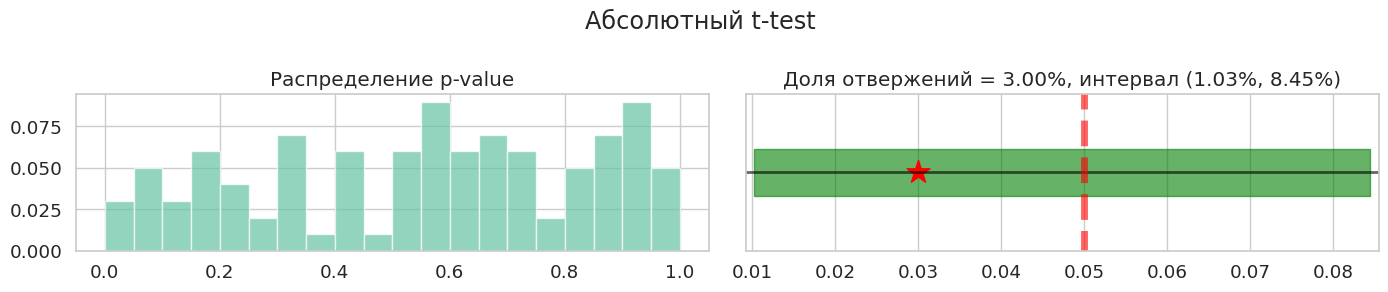

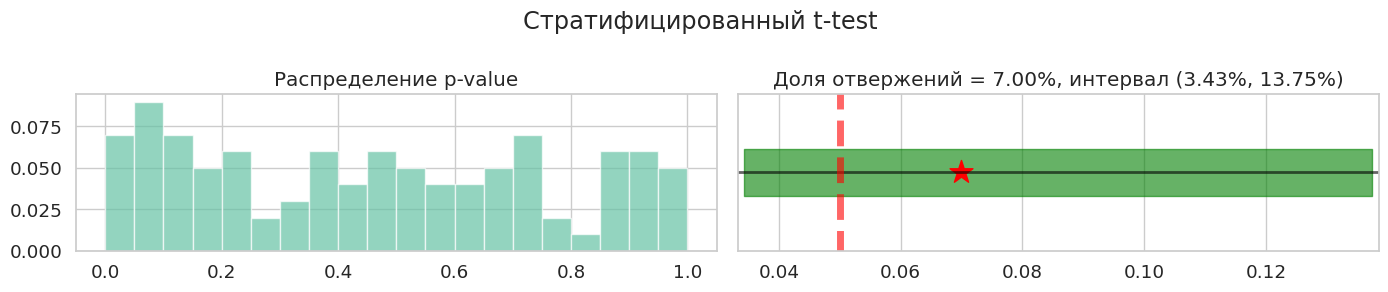

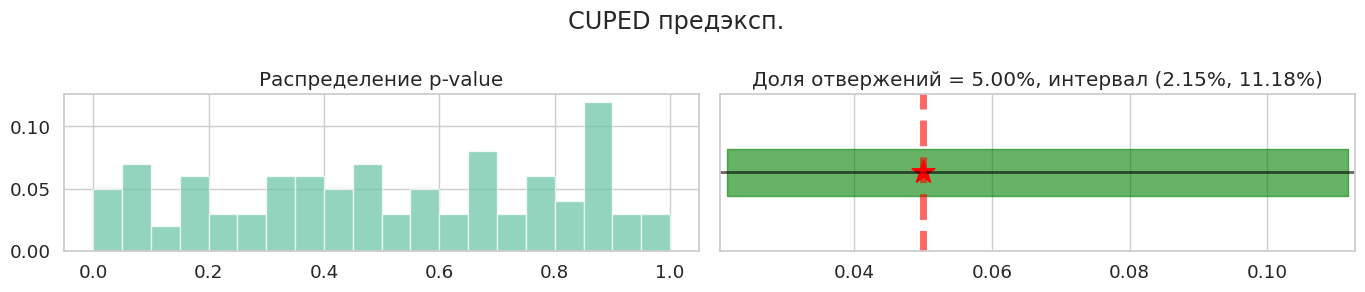

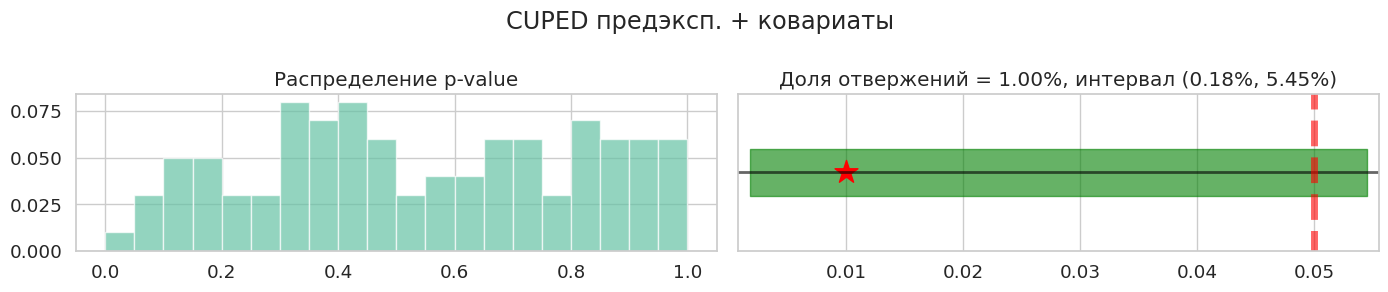

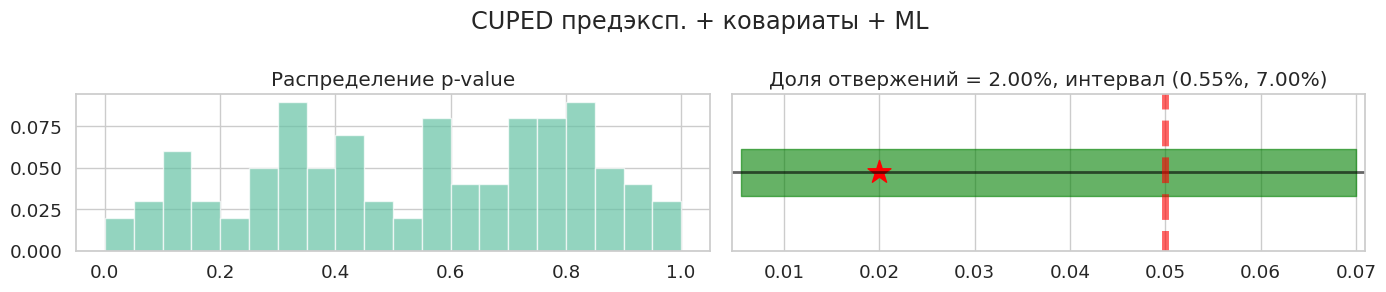

In [338]:
strata_weights=calculate_strata_weights(sales_agg_data,
                                       'Store_Type',
                                       'Exp_Sales_SUM')

model = CatBoostRegressor(iterations=200, verbose=0)

test_list = [
    lambda x, y: absolute_ttest(x['Exp_Sales_SUM'], y['Exp_Sales_SUM']),
    lambda x, y: stratified_ttest(x, y,
                                  strata_name='Store_Type',
                                  target_name='Exp_Sales_SUM',
                                  strata_weights=strata_weights,
                                  method='stratified'),
    lambda x, y: regression_ttest(x, y,
                                 sample_name='Exp_Sales_SUM',
                                 covariate_names=[],
                                 stratify_by=['Store_Type']),
    lambda x, y: regression_ttest(x, y,
                                 sample_name='Exp_Sales_SUM',
                                 covariate_names=covariates_list,
                                 stratify_by=['Store_Type']),
    lambda x, y: regression_ttest(x, y,
                                 sample_name='Exp_Sales_SUM',
                                 covariate_names=covariates_list,
                                 precovariate_names=precovatiates_list,
                                 pre_exp_name='Avg_Sales_4w',
                                 stratify_by=['Store_Type'],
                                 ml_model=model)
]

title_list = [
    'Абсолютный t-test',
    'Стратифицированный t-test',
    'CUPED предэксп.',
    'CUPED предэксп. + ковариаты',
    'CUPED предэксп. + ковариаты + ML'
]

for test, title in zip(test_list, title_list):
    run_experiments(
        test=test,
        target_column='Exp_Sales_SUM',
        generate_sample=lambda size: split_data(sales_agg_data, size),
        sample_size=20,
        n_iter=100,
        draw=True,
        title=title,
    )

Для начала построим просто график мощности

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

Processing effects:   0%|          | 0/5 [00:00<?, ?it/s]

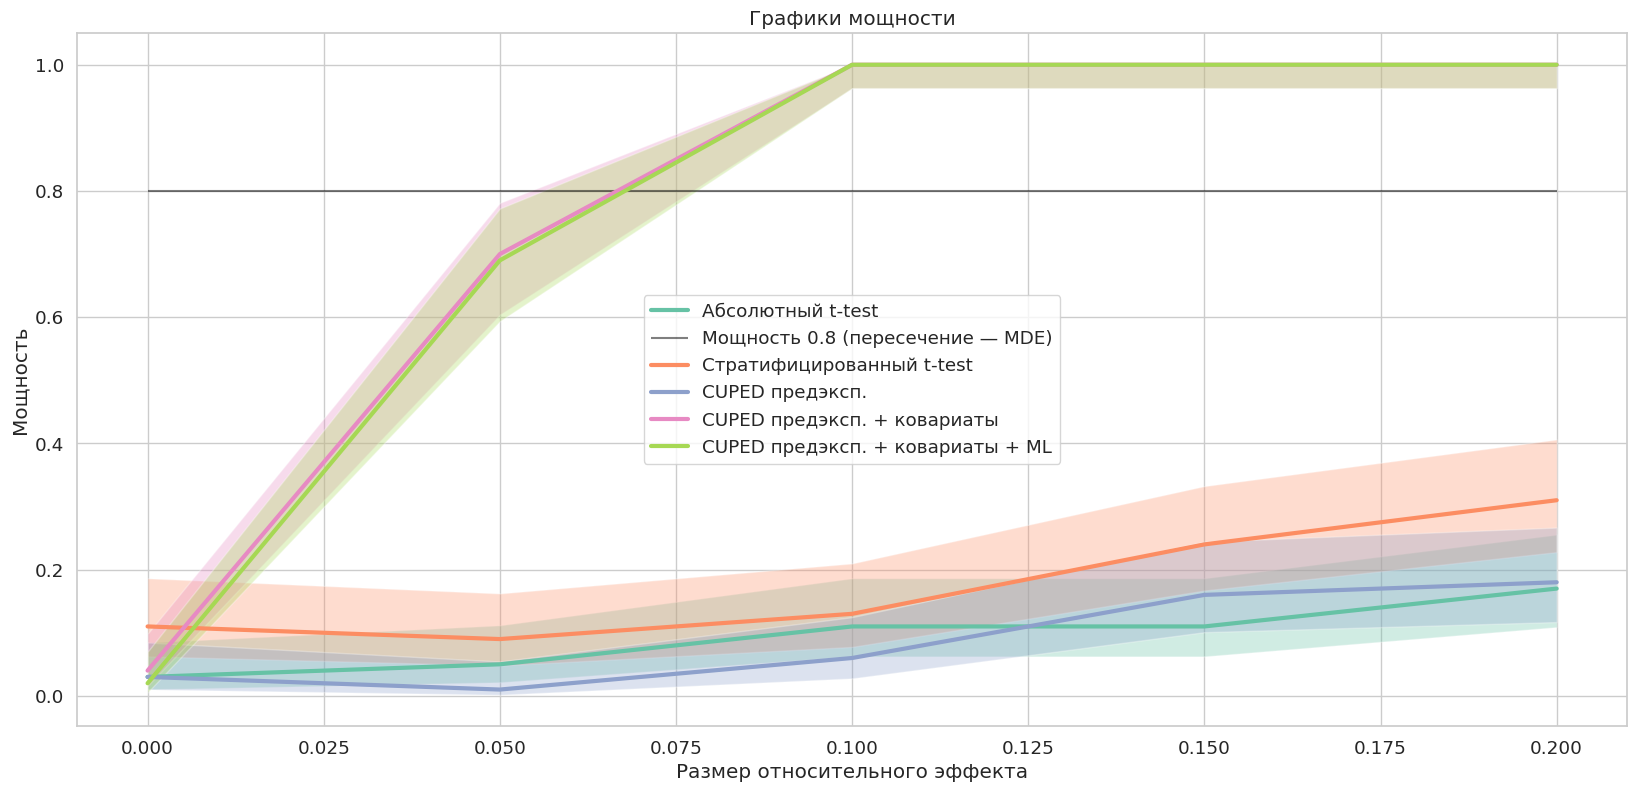

In [339]:
effects_list = np.linspace(0, 0.2, 5)

for i, (test, name) in enumerate(zip(test_list,
                                     title_list)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        target_column='Exp_Sales_SUM',
        generate_samples=lambda size: split_data(sales_agg_data, size),
        sample_size=20,
        effects_list=effects_list,
        n_iter=100,
        alpha=alpha,
    )
    draw_power(
        powers,
        left_bounds,
        right_bounds,
        effects_list=effects_list,
        label=name,
        new_figure=(i == 0),
    )

Теперь попробуем подобрать размер выборки. Будем рисовать мощность в завимости от размера выборки при фиксированном размере эффекта в 5%

In [370]:
def estimate_power_by_sample_size(
    test, generate_samples, 
    n_iter=1000, sample_sizes=np.arange(5, 22, 20), effect=0.05,
    relative_effect=True, alpha=0.05, target_column='pageViews'
):
    """
    Оценка мощности критерия в зависимости от размера выборки при фиксированном эффекте.
    
    Аргументы:
    test -- статистический критерий
    generate_samples -- функция для семплирования выборок
    n_iter -- количество итераций
    sample_sizes -- список размеров выборок
    effect -- фиксированный размер эффекта
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- уровень значимости
    """
    powers = np.zeros(len(sample_sizes))
    left_bounds = np.zeros(len(sample_sizes))
    right_bounds = np.zeros(len(sample_sizes))
    
    for i, size in enumerate(tqdm(sample_sizes, desc="Processing sample sizes", leave=False)):
        powers[i], (left_bounds[i], right_bounds[i]) = run_experiments(
            test, generate_samples, 
            n_iter=n_iter, sample_size=size, effect=effect,
            relative_effect=relative_effect, 
            alpha=alpha, draw=False, target_column=target_column
        )
    
    return powers, left_bounds, right_bounds

def draw_power_by_sample_size(sample_sizes, powers, left_bounds, right_bounds,
                              label=None, new_figure=False):
    """
    Построение графика мощности в зависимости от размера выборки на одном полотне.
    
    Аргументы:
    sample_sizes -- массив размеров выборки
    powers -- массив оценок мощности
    left_bounds, right_bounds -- границы доверительных интервалов
    label -- подпись для графика
    new_figure -- создавать новое полотно или нет
    """
    if new_figure:
        plt.figure(figsize=(20, 9))

    plt.plot(sample_sizes, powers, lw=3, label=label)
    plt.fill_between(sample_sizes, left_bounds, right_bounds, alpha=0.3)
    
    if new_figure:
        plt.hlines(0.8, sample_sizes[0], sample_sizes[-1], color='black',
                   alpha=0.5, linestyle='dashed', label='Мощность 0.8')
    
    plt.xlabel('Размер выборки')
    plt.ylabel('Мощность')
    plt.title('Мощность критерия в зависимости от размера выборки')
    plt.legend()
    plt.grid()

И сами графики

Processing sample sizes:   0%|          | 0/9 [00:00<?, ?it/s]

Processing sample sizes:   0%|          | 0/9 [00:00<?, ?it/s]

Processing sample sizes:   0%|          | 0/9 [00:00<?, ?it/s]

Processing sample sizes:   0%|          | 0/9 [00:00<?, ?it/s]

Processing sample sizes:   0%|          | 0/9 [00:00<?, ?it/s]

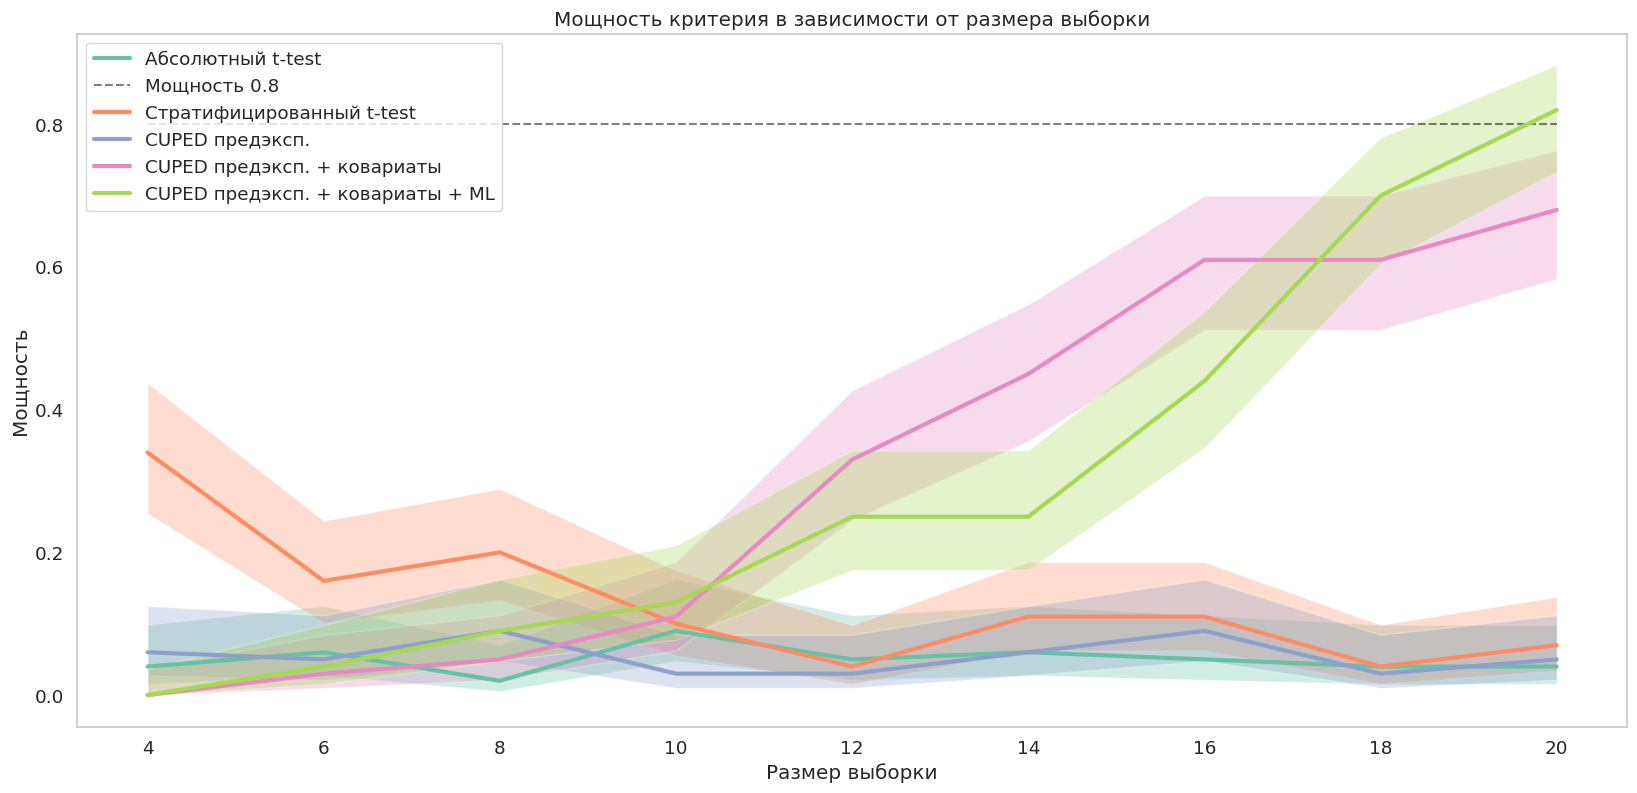

In [372]:
sample_sizes=np.arange(4, 22, 2)

for i, (test, name) in enumerate(zip(test_list,
                                     title_list)):
    warnings.simplefilter("ignore", category=RuntimeWarning)
    powers, left_bounds, right_bounds = estimate_power_by_sample_size(
        test=test,
        target_column='Exp_Sales_SUM',
        sample_sizes=sample_sizes,
        generate_samples=lambda size: split_data(sales_agg_data, size),
        effect=0.05,
        n_iter=100,
        alpha=0.05,
    )
    draw_power_by_sample_size(
        sample_sizes,
        powers,
        left_bounds,
        right_bounds,
        label=name,
        new_figure=(i == 0),
    )

**Выводы:** 

Для детектирования эффекта в 5% требуется ~20 магазинов. 

Стратификационный t-test ведет себя странно - это из-за стратификации по размеру магазина (а при маленькой выборке стратификация дает большую ошибку)

Очень сильно повышают мощность ковариаты - в частности ML ковариата, особенно если она обучается на большей выборке

Дальнейшие возможные улучшения: ML модель обучать на большем объеме данных (у нас история аж на 2 года, а мы использовали только 4 недели); использовать департаменты магазинов и ML-но предсказывать покупки на каждом из департаметов, а потом суммировать;